## Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import make_column_transformer
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Understand Data

In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
df.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace=True)

In [6]:
df.drop('CustomerID', axis=1, inplace=True)

In [7]:
df.head(2)

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81


## Visualize Data

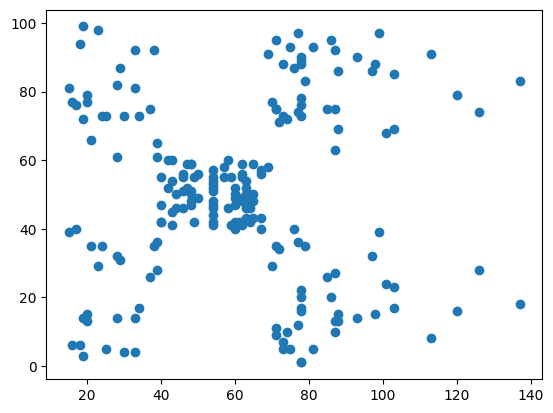

In [8]:
# scatter plot to get idea of clusters
plt.scatter(df['Annual Income'], df['Spending Score']);

## Removing outliers

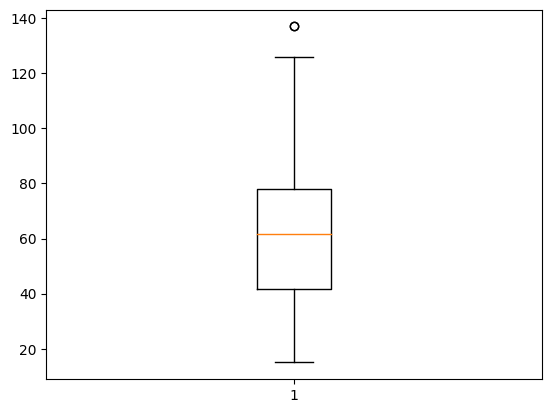

In [9]:
plt.boxplot(df['Annual Income']);

In [10]:
# Calculate Q1 and Q3
q1 = np.percentile(df['Annual Income'], 25)
q3 = np.percentile(df['Annual Income'], 75)

# Calculate IQR
iqr = q3 - q1
k = 1.5
# Define inner fences
lower_fence = q1 - k * iqr
upper_fence = q3 + k * iqr

In [11]:
df = df[(lower_fence <= df['Annual Income']) & (df['Annual Income'] <= upper_fence)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6ece10370>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6ece108b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6ece100d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6ece11cc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6ece11a20>],
 'means': []}

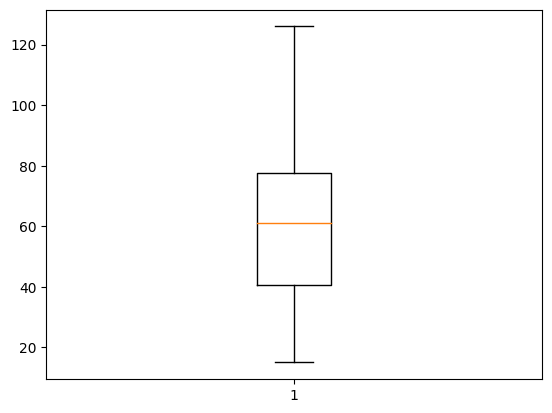

In [12]:
plt.boxplot(df['Annual Income'])

### Preprocess

In [13]:
# OneHotEncode categorical columns
ct = make_column_transformer(
(OneHotEncoder(handle_unknown='ignore'), ['Gender']), remainder='passthrough'
)

X = ct.fit_transform(df)

In [14]:
X

array([[  0.,   1.,  19.,  15.,  39.],
       [  0.,   1.,  21.,  15.,  81.],
       [  1.,   0.,  20.,  16.,   6.],
       [  1.,   0.,  23.,  16.,  77.],
       [  1.,   0.,  31.,  17.,  40.],
       [  1.,   0.,  22.,  17.,  76.],
       [  1.,   0.,  35.,  18.,   6.],
       [  1.,   0.,  23.,  18.,  94.],
       [  0.,   1.,  64.,  19.,   3.],
       [  1.,   0.,  30.,  19.,  72.],
       [  0.,   1.,  67.,  19.,  14.],
       [  1.,   0.,  35.,  19.,  99.],
       [  1.,   0.,  58.,  20.,  15.],
       [  1.,   0.,  24.,  20.,  77.],
       [  0.,   1.,  37.,  20.,  13.],
       [  0.,   1.,  22.,  20.,  79.],
       [  1.,   0.,  35.,  21.,  35.],
       [  0.,   1.,  20.,  21.,  66.],
       [  0.,   1.,  52.,  23.,  29.],
       [  1.,   0.,  35.,  23.,  98.],
       [  0.,   1.,  35.,  24.,  35.],
       [  0.,   1.,  25.,  24.,  73.],
       [  1.,   0.,  46.,  25.,   5.],
       [  0.,   1.,  31.,  25.,  73.],
       [  1.,   0.,  54.,  28.,  14.],
       [  0.,   1.,  29.,

## Create Model

In [15]:
model = KMeans(n_clusters = 5)
cluster = model.fit_predict(X)
df['cluster'] = cluster

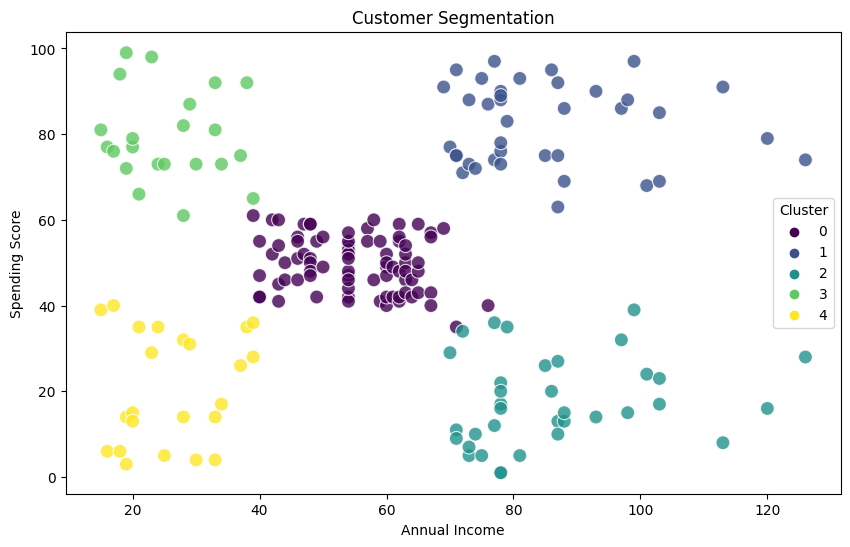

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_customer_segmentation(data):
    # Scatter plot of Annual Income vs Spending Score, color-coded by cluster
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster', data=data, palette='viridis', s=100, alpha=0.8)
    
    # Customize plot
    plt.title('Customer Segmentation')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend(title='Cluster')
    plt.show()

# Example usage
# Assuming 'data' is your DataFrame
plot_customer_segmentation(df)

## Building Pipeline

In [17]:
def segment_customers(df_path):
    print('\nReading Data...')
    df = pd.read_csv(df_path)
    df.head()
    df.drop(columns='CustomerID')
    print('\nPlotting Scatter Plot...')
    plt.figure()
    plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)']);
    print('\nCalculating percentiles for outliers...')
    # Calculate Q1 and Q3
    q1 = np.percentile(df['Annual Income (k$)'], 25)
    q3 = np.percentile(df['Annual Income (k$)'], 75)

    # Calculate IQR
    iqr = q3 - q1
    k = 1.5
    # Define inner fences
    lower_fence = q1 - k * iqr
    upper_fence = q3 + k * iqr
    
    # Find indices of data points within the inner fences
    df = df[(lower_fence <= df['Annual Income (k$)']) & (df['Annual Income (k$)'] <= upper_fence)]
    print('\nPlotting Annual Income for Outliers...')
    plt.figure()
    plt.boxplot(df['Annual Income (k$)'])
    print('\nOneHotEncoding Categorical Columns...')
#     OneHotEncode categorical columns
    ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Gender']), remainder='passthrough'
    )
    
    X = ct.fit_transform(df)
    print('\nBuilding Model...')
    model = KMeans(n_clusters = 5)
    cluster = model.fit_predict(X)
    df['Cluster'] = cluster
    print('\nPlotting Clusters...')
    # Scatter plot of Annual Income vs Spending Score, color-coded by cluster
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)
    
    # Customize plot
    plt.title('Customer Segmentation')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend(title='Cluster')
    plt.show(); 


Reading Data...

Plotting Scatter Plot...

Calculating percentiles for outliers...

Plotting Annual Income for Outliers...

OneHotEncoding Categorical Columns...

Building Model...

Plotting Clusters...


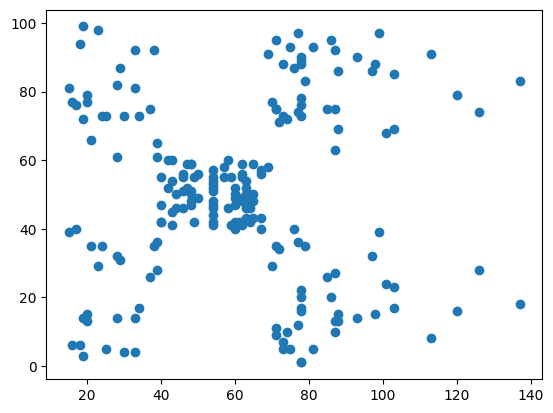

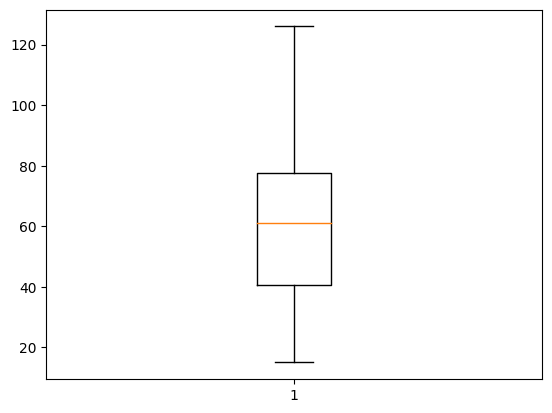

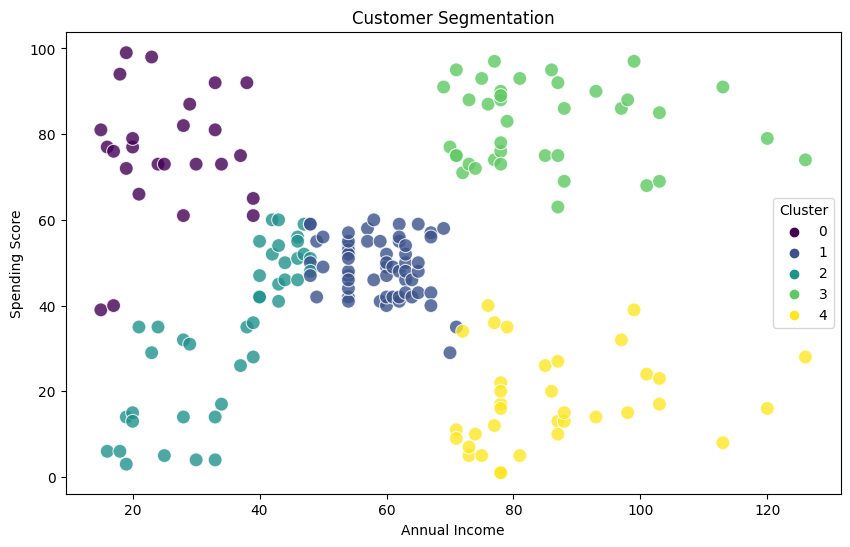

In [18]:
segment_customers('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# END 